### This ipython notebook tries to reproduce the calculation in S.Weiss's paper
Solid-State Electronics Vol.31 No.12 pp.1733

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Set a capacitance transient using eq.8

In [20]:
def tran(A,tau,t0,t):
    return A*np.exp(-(t+t0)/tau)

In [21]:
time=np.linspace(0,1*128,num=128)

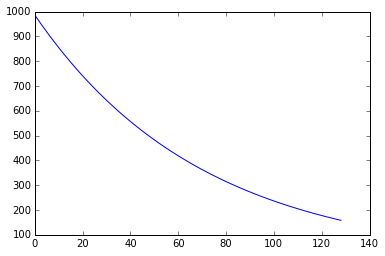

In [22]:
sig=tran(1000,70,1,time)
plt.plot(time,sig)

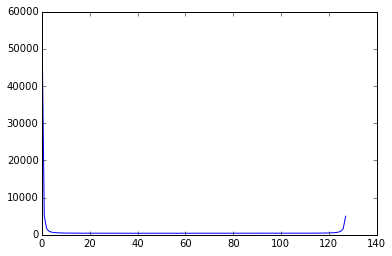

In [23]:
inv_sig_1=np.fft.fft(sig)
plt.plot(np.real(inv_sig_1))

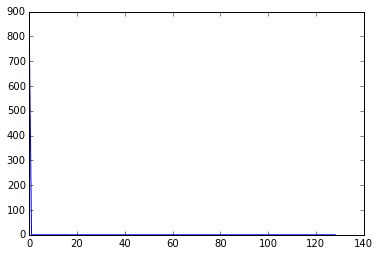

In [24]:
sig=tran(1000,7e-3,1e-3,time)
plt.plot(time,sig)

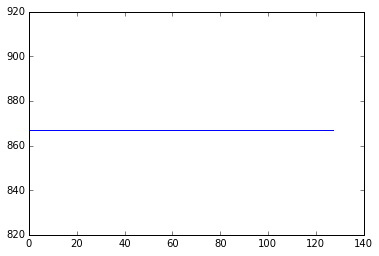

In [25]:
inv_sig_2=np.fft.fft(sig)
plt.plot(np.real(inv_sig_2))

### Plot the Fig.1
Note that the sign of imaginary coefficients is different from the paper, and thus it has to be inversed.

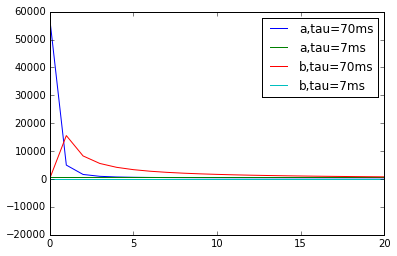

In [48]:
plt.plot(np.real(inv_sig_1),hold=True,label="a,tau=70ms")
plt.plot(np.real(inv_sig_2),label="a,tau=7ms")
plt.plot(-np.imag(inv_sig_1),label="b,tau=70ms")
plt.plot(-np.imag(inv_sig_2),label="b,tau=7ms")
plt.xlim([0,20])
plt.legend()

In [35]:
def calc_fft_coef(A,tau,N,t_0,dt):
    time=np.linspace(0,dt*N,num=N)
    ct=tran(A,tau,t_0,time)
    inv_ct=np.fft.fft(ct)
    a=np.real(inv_ct)
    b=np.imag(inv_ct)
    return a,b

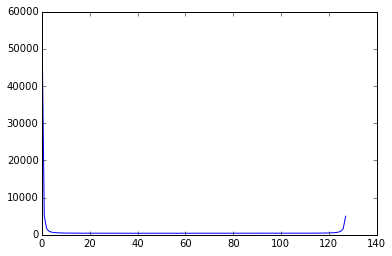

In [37]:
a,b=calc_fft_coef(1000,70,128,1,1)
plt.plot(a)

### Draw Fig. 2

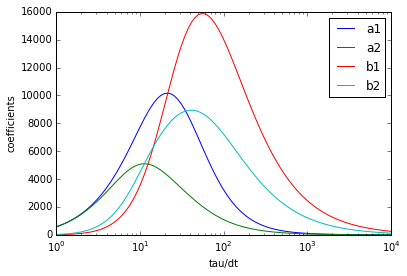

In [47]:
tau_arr=np.logspace(0,4,num=100)
a1_arr=[]
a2_arr=[]
b1_arr=[]
b2_arr=[]
for tau in tau_arr:
    a,b=calc_fft_coef(1000,tau,128,1,1)
    a1_arr.append(a[1])
    a2_arr.append(a[2])
    b1_arr.append(-b[1])
    b2_arr.append(-b[2])

plt.semilogx(tau_arr,a1_arr,hold=True,label="a1")
plt.semilogx(tau_arr,a2_arr,label="a2")
plt.semilogx(tau_arr,b1_arr,label="b1")
plt.semilogx(tau_arr,b2_arr,label="b2")
plt.legend()
plt.ylabel("coefficients")
plt.xlabel("tau/dt")